## Solar Panel Fault Identification 
### Task Model
Applied Machine Learning Project <br>

Solar Panel Fault Detection using CNN

**Task description and objectives**
- The aim of this project is to create a Machine Learning Model that accurately predicts and shows what type of defect a solar panel has, based on pictures of it.
- It will be a supervised learning model. 
- Supervised: Predict type or presence of defect (classification) based on sensor/thermal/image data.


In [2]:
# Libraries used throughout this script
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Dataset extraction

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/pythonafroz/solar-panel-images')

img_height = 244
img_width = 244
batch_size = 32

data_dir = './solar-panel-images/Faulty_solar_panel'

train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

Skipping, found downloaded files in ".\solar-panel-images" (use force=True to force download)
Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


Class labels: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


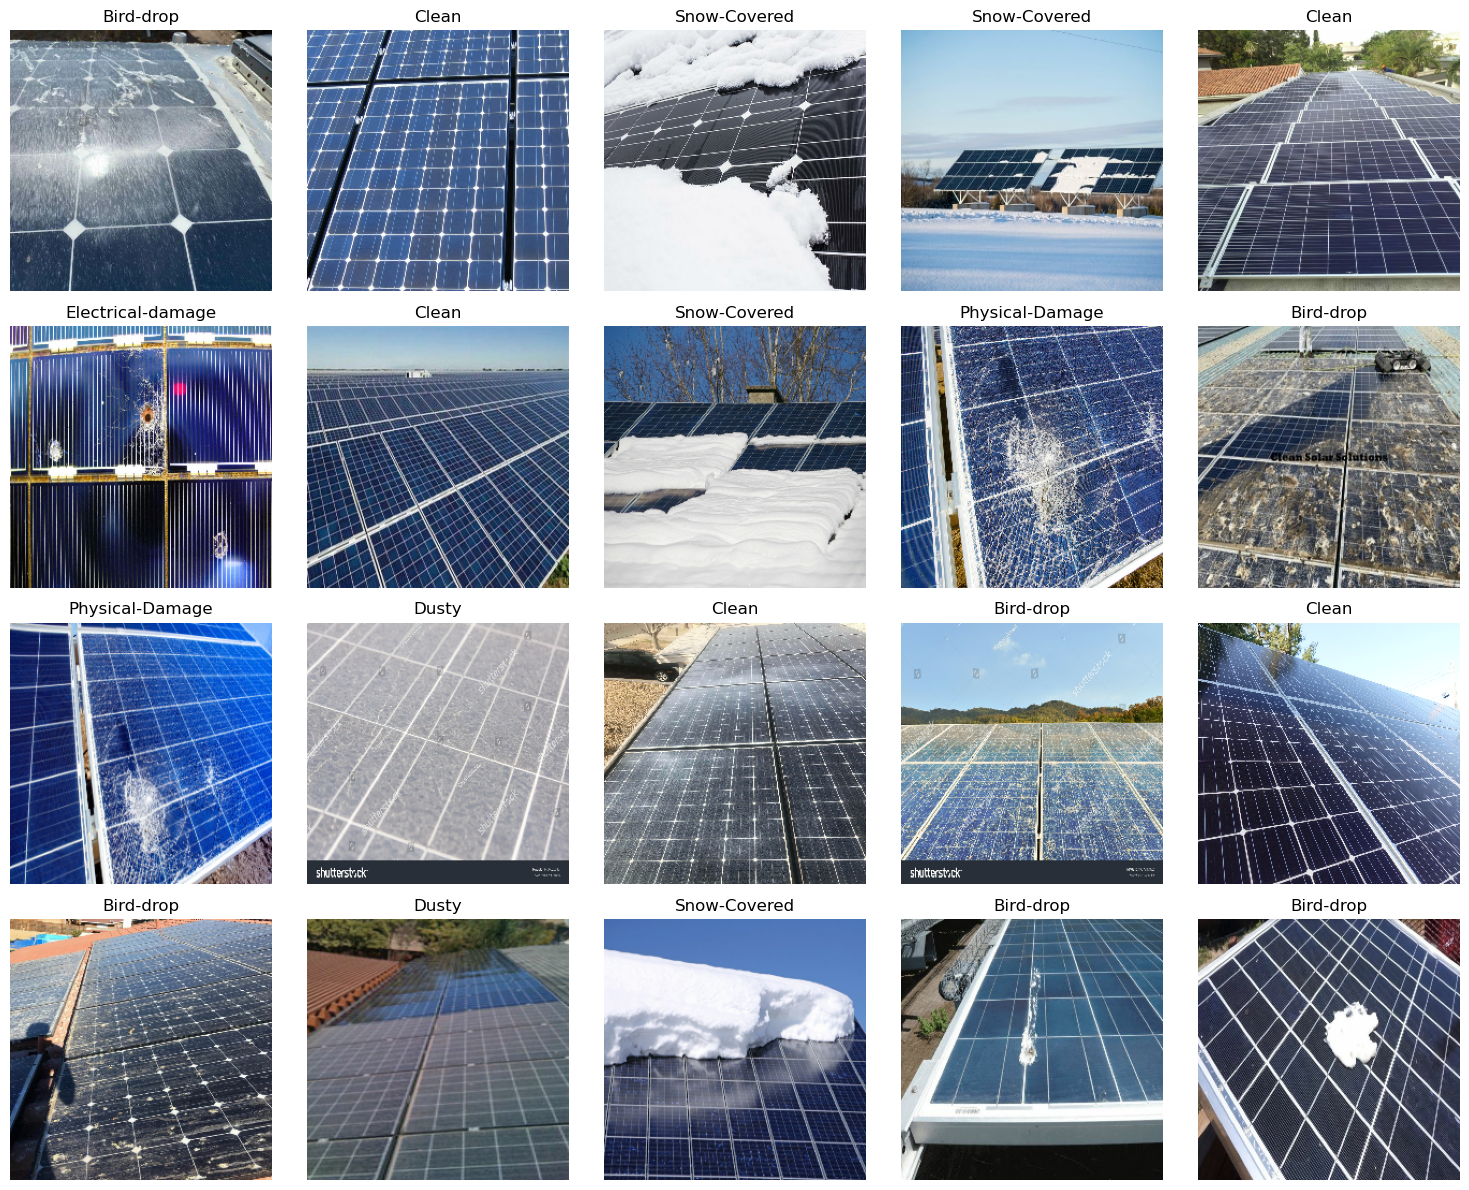

In [5]:
# Get class names
class_names = train_dataset.class_names
print("Class labels:", class_names)

# Fetch one batch of images
plt.figure(figsize=(15, 12))
for images, labels in train_dataset.take(1):
    for i in range(20):  # Show 20 images
        ax = plt.subplot(4, 5, i + 1)  # 4 rows x 5 columns
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()